In [1]:
from interval import interval, inf, fpu, imath

# Construction

In [2]:
k = interval([0, 1], [2, 3], [10, 15])

In [3]:
interval[1, 2]

interval([1.0, 2.0])

In [4]:
interval(1, 2)

interval([1.0], [2.0])

In [5]:
interval(1), interval[1]

(interval([1.0]), interval([1.0]))

In [6]:
interval()

interval()

# Operations

### add

In [7]:
interval[1, 2] + interval[4, 5]

interval([5.0, 7.0])

### subtract

In [8]:
interval[5, 7] - interval[1, 2]

interval([3.0, 6.0])

### multiply

In [9]:
interval[0, 2] * interval[4, inf]

interval([-inf, inf])

### divide

In [10]:
interval[1] / interval[3]

interval([0.3333333333333333, 0.33333333333333337])

### intersect

In [11]:
interval[1, 4] & interval[2, 5]

interval([2.0, 4.0])

### merged by set-theoretic union

In [12]:
interval[1, 4] | interval[2, 5]

interval([1.0, 5.0])

In [13]:
interval[1, 2] | interval[4, 5]

interval([1.0, 2.0], [4.0, 5.0])

### integer power

In [14]:
interval[-3, 2] ** 2

interval([0.0, 9.0])

### absolute value

In [15]:
abs(interval[-3, 2])

interval([0.0, 3.0])

Scalar numbers are automatically cast as intervals when used as operands together with intervals

In [16]:
1/interval[3] == interval[1]/interval[3]

True

# Inspection

The in operator can be used to test whether a scalar is contained in an interval

In [17]:
0 in interval[-1, 1]

True

In [18]:
0 in interval[1, 2]

False

or whether an interval is a subset of another interval

In [19]:
interval[1, 2] in interval[0, 3]

True

In [20]:
interval[1, 2] in interval[1.5, 3]

False

The len operator returns the number of connected components in the interval

In [21]:
len(interval())

0

In [22]:
len(interval[1, 2])

1

In [23]:
len(interval(1, 2))

2

# API Documentation

## interval - Interval arithmetic

### interval.inf

In [24]:
inf + inf == inf

True

### components

In [25]:
[x for x in interval([1, 2], 3).components]

[interval([1.0, 2.0]), interval([3.0])]

### extrema

In [26]:
interval([1, 2], 3).extrema

interval([1.0], [2.0], [3.0])

### format

In [27]:
interval[-2.1, 3.4].format("%+g")

'interval([-2.1, +3.4])'

### classmethod function(f)

In [32]:
@interval.function
def mirror(c):
    return (-c.sup, -c.inf), c

In [33]:
mirror(interval([1, 2], 3))

interval([-3.0], [-2.0, -1.0], [1.0, 2.0], [3.0])

### classmethod hull(intervals)

In [34]:
interval.hull((interval[1, 3], interval[10, 15]))

interval([1.0, 15.0])

In [35]:
interval.hull([interval(1, 2)])

interval([1.0, 2.0])

### inverse(x)

In [36]:
interval.inverse(interval([1,2]))

interval([0.5, 1.0])

### midpoint

In [37]:
interval([1, 2], 3).midpoint

interval([1.5], [3.0])

### newton(f, p, maxiter=10000, tracer_cb=None)

Find the roots of f(x) (where p=df/dx) within self using Newton-Raphson.

In [38]:
interval[-10, 10].newton(lambda x: x - x**3, lambda x: 1 - 3*x**2)

interval([-1.0], [0.0], [1.0])

In [39]:
interval[-1.5, 3].newton(lambda x: (x**2 - 1)*(x - 2), lambda x:3*x**2 - 4*x -1)

interval([-1.0], [1.0], [2.0])

### classmethod union(intervals)

In [40]:
interval.union([interval([1, 3], [4, 6]), interval([2, 5], 9)])

interval([1.0, 6.0], [9.0])

In [41]:
interval([1, 3], [4, 6]) | interval([2, 5], 9)

interval([1.0, 6.0], [9.0])

## interval.fpu — FPU control and helper functions

This module provides:

Mechanisms for the control of the rounding modes of the floating-point unit (FPU);

Helper functions that respect IEEE 754 semantics.

Limitations:

The current implementation of the FPU’s rounding-mode control is thought to be not thread-safe.

Infinity in the sense of IEEE 754. Also exported as interval.inf.

In [42]:
fpu.infinity + fpu.infinity == fpu.infinity

True

### interval.fpu.nan

An instance of not-a-number, in the sense of IEEE 754. Note that you must not use nan in comparisons. Use isnan instead.

In [43]:
fpu.nan == fpu.nan

False

In [44]:
fpu.isnan(fpu.nan)

True

## interval.imath — Mathematical functions for intervals

In [45]:
imath.atan(interval[1, 2])

interval([0.7853981633974483, 1.1071487177940906])

In [46]:
imath.atanpi(interval[1, 2])

interval([0.25, 0.35241638234956674])

In [47]:
imath.cos(interval[-1, 1])

interval([0.5403023058681397, 1.0])

In [48]:
imath.cosh(interval[-1, 1])

interval([1.0, 1.543080634815244])

In [49]:
imath.cospi(interval[-1, 1])

interval([-1.0, 1.0])

In [50]:
imath.tan(interval[-1, 1])

interval([-1.5574077246549023, 1.5574077246549023])

In [51]:
imath.exp(interval[-1, 1])

interval([0.3678794411714423, 2.7182818284590455])

In [52]:
imath.expm1(interval[-1, 1])

interval([-0.6321205588285578, 1.7182818284590453])

In [53]:
imath.log(interval[-1, 2])

interval([-inf, 0.6931471805599454])

In [54]:
imath.log10(interval[-1, 2])

interval([-inf, 0.3010299956639812])

In [55]:
imath.log1p(interval[-1, 2])

interval([-inf, 1.0986122886681098])

In [56]:
imath.log2(interval[-1, 2])

interval([-inf, 1.0])

In [57]:
imath.sin(interval[-1, 1])

interval([-0.8414709848078966, 0.8414709848078966])

In [58]:
imath.sinh(interval[-1, 1])

interval([-1.1752011936438016, 1.1752011936438016])

In [59]:
imath.sinpi(interval[-1, 1])

interval([-1.0, 1.0])

In [60]:
imath.sqrt(interval[-1, 2])

interval([0.0, 1.4142135623730951])

In [61]:
imath.tan(interval[-1, 1])

interval([-1.5574077246549023, 1.5574077246549023])

In [62]:
imath.tanh(interval[-1, 1])

interval([-0.7615941559557651, 0.7615941559557651])

# Accumulated rounding errors

In [63]:
def f(x,y):
    return ((333.75 - x**2)* y**6 + x**2 *(11* x**2 * y**2 - 121 * y**4 - 2)+ 5.5 * y**8 + x/(2*y))

In [64]:
f(77617.0, 33096.0)

1.1726039400531787

In [65]:
-54767/66192

-0.8273960599468214

In [66]:
f(interval(77617.0), interval(33096.0))

interval([-3.541774862152234e+21, 3.5417748621522344e+21])

# Dependency problem

In [67]:
(lambda x: 2*x / x)(interval[1,2])

interval([1.0, 4.0])

In [68]:
(lambda x: x**2 + 2*x)(interval[-1,1])

interval([-2.0, 3.0])

In [69]:
(lambda x: x*(x + 2))(interval[-1,1])

interval([-3.0, 3.0])

In [70]:
(lambda x: (x + 1)**2 - 1)(interval[-1,1])

interval([-1.0, 3.0])

## Wrapping effect

In [71]:
import matplotlib.pyplot as plt
import numpy as np

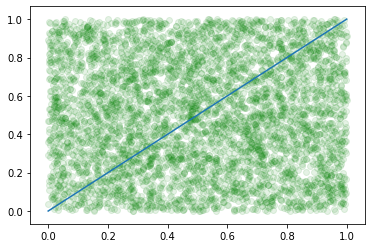

In [72]:
#x=[0,1],x=y
plt.plot([0,1],[0,1]) #x=y
x = np.random.rand(5000)
y = np.random.rand(5000)
#x=interval(0,1),y=interval(0,1)
plt.scatter(x,y,alpha=0.1,color='g') 